<a href="https://colab.research.google.com/github/ThallesLM/Clustering_K-mean/blob/main/Clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importação de bibliotecas e conjunto de dados

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Desccrição dos dados <p>
Age = idade <p>
Weigth = peso <p>
Height = altura <p>
BMI = IMC <p>
HGS = Força de Preensão manual


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Base de dados/R.xlsx")

In [ ]:
df.head()

,Age,Weight,Height,BMI,HGS
0,-0.421736,-1.597057,-0.839184,-1.42611,-0.992776
1,-0.421736,-1.597057,-0.839184,-1.42611,-0.992776
2,-0.421736,-1.597057,-0.839184,-1.42611,-0.769887
3,-0.421736,-1.597057,-0.839184,-1.42611,-1.327110
4,-0.421736,-1.597057,-0.839184,-1.42611,-0.992776


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     206 non-null    float64
 1   Weight  206 non-null    float64
 2   Height  206 non-null    float64
 3   BMI     206 non-null    float64
 4   HGS     206 non-null    float64
dtypes: float64(5)
memory usage: 8.2 KB


In [ ]:
import plotly.express as px

In [ ]:
hist=px.histogram(df, x="Age",nbins=50)
hist.update_layout(width=600, height=400, title_text="DISTRIBUIÇÃO DAS IDADES")
hist.show()

In [ ]:
hist=px.histogram(df, x="Weight",nbins=50)
hist.update_layout(width=600, height=400, title_text="DISTRIBUIÇÃO DOS PESOS")
hist.show()

In [ ]:
hist=px.histogram(df, x="Height",nbins=50)
hist.update_layout(width=600, height=400, title_text="DISTRIBUIÇÃO DAS ALTURAS")
hist.show()

In [ ]:
hist=px.histogram(df, x="BMI",nbins=40)
hist.update_layout(width=600, height=400, title_text="DISTRIBUIÇÃO DO BMI (IMC)")
hist.show()

In [ ]:
hist=px.histogram(df, x="HGS",nbins=50)
hist.update_layout(width=600, height=400, title_text="DISTRIBUIÇÃO DA FORÇA DE PREENSÃO MANUAL")
hist.show()

In [ ]:
df.rename(columns={'Age':'age', 'Weight':'weight', 'Height':'height', 'HGS':'hgs', 'BMI':'bmi'},inplace=True)

In [ ]:
df.columns

Index(['age', 'weight', 'height', 'bmi', 'hgs'], dtype='object')

# Aplicação da técnica K-means (2 variáveis)

## Esse Algoritmo utiliza a determinação de alguns pontos centrais (centróides)<p>
## A partir desses centroídes é calculada a distãncia (geralmente euclidiana)deles à cada observação e a partir daí ocorre a classificação.

In [ ]:
dados=df[["bmi", "hgs"]].values # nova variável

In [ ]:
from sklearn.cluster import KMeans # importação da biblioteca
wcss = []                          # criação de variável com o metodo para otimização de k
for i in range (1,11):             # metodo de otimização com k
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=5, max_iter=300)
    kmeans.fit(dados)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
wcss         # vizualização da series gerada

[409.9999999999855,
 236.71135235693976,
 153.23414706870767,
 122.69979611053927,
 101.87703352624732,
 84.38334286274588,
 69.34055852790326,
 57.991143142990346,
 49.2634558513938,
 42.89026122204095]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'WCSS')

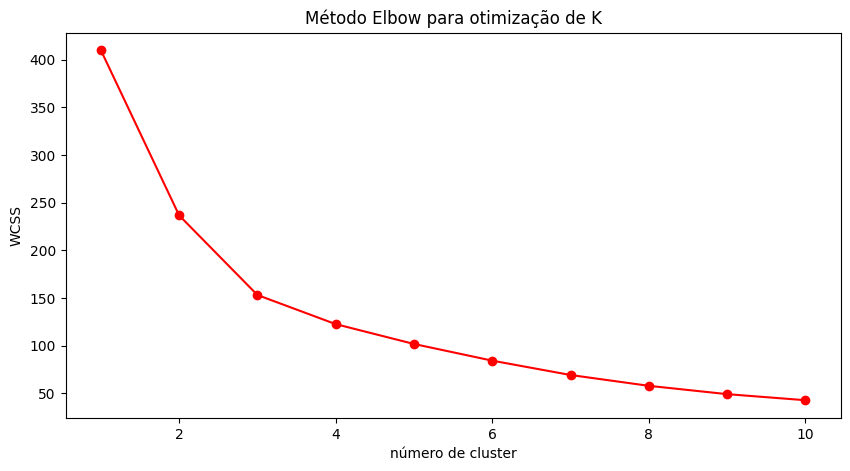

In [ ]:
# visualização do resultado do método de otimização de K
# idealmente busca-se o valor de k que é o principal ponto de inflexão entre X e Y

plt.figure(figsize=(10,5))                          # criaçãod da figura
sns.lineplot(x=range(1,11), y=wcss, color='red')    # determinação dos variáveis
plt.plot(range(1,11), wcss, 'o', color='red')       # determina os marcadores no gráfico
plt.title("Método Elbow para otimização de K")
plt.xlabel('número de cluster')
plt.ylabel('WCSS')


In [ ]:
# cria e salva o modelo que será aplicado aos dados

kmeans=KMeans(n_clusters=3, init='k-means++', random_state=5, max_iter=300)

In [ ]:
# aplica o modelo aos dados e salva em nova variável

kmeans1=kmeans.fit(dados)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# determina os centroides do modelo treinado

centroides=kmeans1.cluster_centers_
centroides

array([[ 1.24188285,  0.48485928],
       [-0.46879832, -0.97406969],
       [-0.45706638,  0.82832931]])

In [ ]:
# o modelo faz a classificação dos dados em 3 clusters, conforme visualizado no Método Elbow

classificacao = kmeans1.labels_
classificacao



array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

## Visualização gráfica

In [ ]:
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
# Definindo as cores para cada cluster
cores = ['Green', 'blue', 'red']

# Criando um mapa de cores que mapeia cada cluster para uma cor
mapa_cores = {cluster: cor for cluster, cor in enumerate(cores)}

# Aplicando o mapa de cores à sua classificação para obter as cores dos pontos
cores_pontos = [mapa_cores[cluster] for cluster in classificacao]

# Criando um mapa de legendas que mapeia cada cor para o nome do cluster
mapa_legendas = {'Green': 'Cluster 0', 'blue': 'Cluster 1', 'red': 'Cluster 2'}

# Aplicando o mapa de legendas às cores dos pontos para obter os nomes dos clusters
nomes_clusters = [mapa_legendas[cor] for cor in cores_pontos]

# Criando o gráfico de dispersão para os dados
graf1 = px.scatter(x=dados[:,0], y=dados[:,1], color=nomes_clusters)

# Criando o gráfico de dispersão para os centroides
graf2 = px.scatter(x=centroides[:,0], y=centroides[:,1], size=[10,10,10])

# Concatenando as figuras
graf3 = go.Figure(data=graf1.data + graf2.data)

# Ajustando os elementos visuais da figura
graf3.update_layout(width=900, height=700, title_text='Agrupamento K-means')
graf3.update_xaxes(title_text='BMI')
graf3.update_yaxes(title_text='HGS')

# Mostrando o gráfico
graf3.show()


In [ ]:
# salva em um novo dataframe

res01 = pd.DataFrame(classificacao, columns=['clusters'])

In [ ]:
res01

,clusters
0,1
1,1
2,1
3,1
4,1
...,...
201,0
202,0
203,0
204,0


In [ ]:
# concatena com o dataframe original
# agora temos os dados originais com os cluster

result_2var = pd.concat([df, res01], axis=1)


In [ ]:
result_2var


,age,weight,height,bmi,hgs,clusters
0,-0.421736,-1.597057,-0.839184,-1.426110,-0.992776,1
1,-0.421736,-1.597057,-0.839184,-1.426110,-0.992776,1
2,-0.421736,-1.597057,-0.839184,-1.426110,-0.769887,1
3,-0.421736,-1.597057,-0.839184,-1.426110,-1.327110,1
4,-0.421736,-1.597057,-0.839184,-1.426110,-0.992776,1
...,...,...,...,...,...,...
201,0.741062,2.105135,0.608654,1.939780,0.790337,0
202,0.741062,2.105135,0.608654,1.939780,0.790337,0
203,0.741062,2.105135,0.608654,1.939780,0.121669,0
204,0.741062,2.105135,0.608654,1.939780,0.790337,0


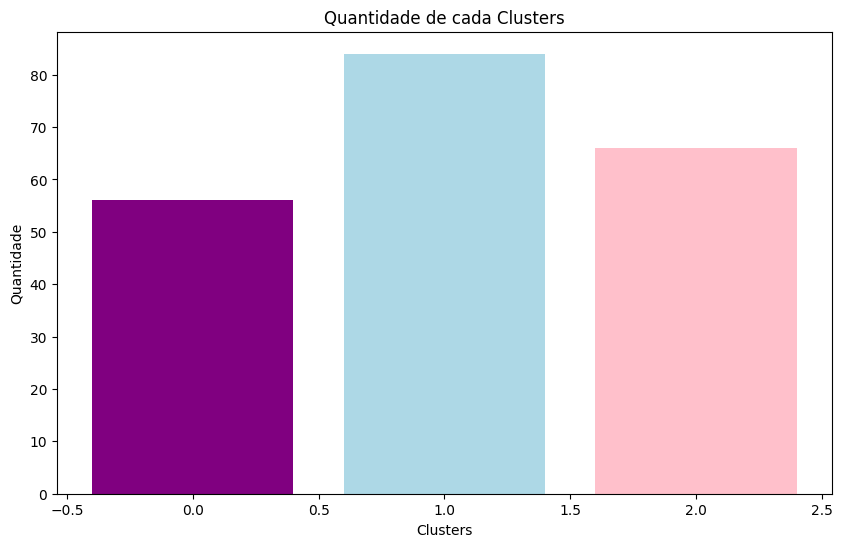

In [ ]:
import matplotlib.pyplot as plt

# Contando a quantidade de cada cluster
contagem_clusters = res01['clusters'].value_counts()

# Criando o gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(contagem_clusters.index, contagem_clusters.values, color=['lightblue', 'pink', 'purple'])

# Adicionando títulos e rótulos
plt.title('Quantidade de cada Clusters')
plt.xlabel('Clusters')
plt.ylabel('Quantidade')

# Mostrando o gráfico
plt.show()


# Aplicação da técnica K-means (para todo o conjunto de dados)

In [ ]:
from sklearn.cluster import KMeans # importação da biblioteca
wcss = []                          # criação de variável com o metodo para otimização de k
for i in range (1,15):             # metodo de otimização com k
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=5, max_iter=300)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Text(0, 0.5, 'WCSS')

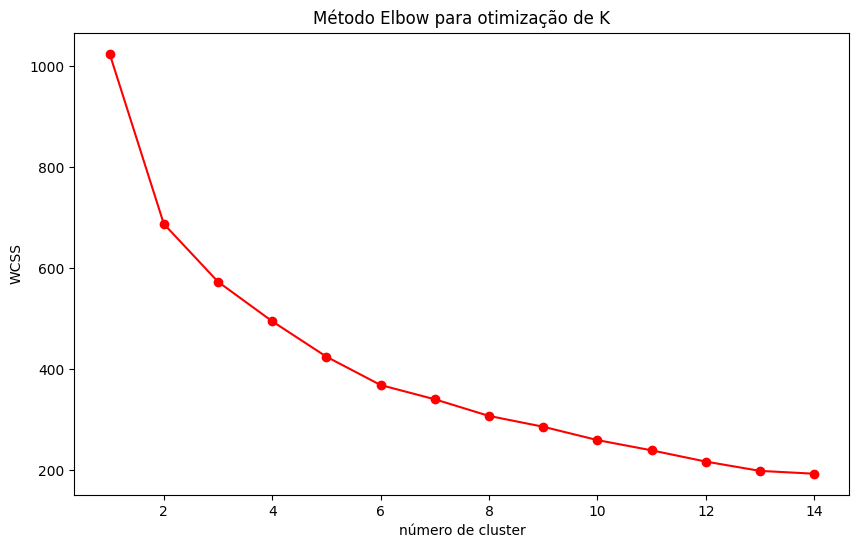

In [ ]:
plt.figure(figsize=(10,6))                          # criaçãod da figura
sns.lineplot(x=range(1,15), y=wcss, color='red')    # determinação dos variáveis
plt.plot(range(1,15), wcss, 'o', color='red')       # determina os marcadores no gráfico
plt.title("Método Elbow para otimização de K")
plt.xlabel('número de cluster')
plt.ylabel('WCSS')

In [ ]:
kmeans=KMeans(n_clusters=5, init='k-means++', random_state=5, max_iter=300)

In [ ]:
kmeans2=kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
centroides=kmeans2.cluster_centers_
centroides

array([[-0.63706897,  0.49199629,  0.64082846,  0.20903199,  0.11444609],
       [-0.61738138, -1.07635076, -0.00265515, -1.19971371, -0.3523416 ],
       [ 0.63031928, -0.31836845, -0.28762646, -0.19308853,  0.68021898],
       [ 1.2346578 ,  1.58109875,  0.51351063,  1.46228217,  0.55948735],
       [-0.25008489, -0.66996656, -1.34592718, -0.01235894, -1.28253237]])

In [ ]:
classificacao2 = kmeans2.labels_
classificacao2


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 2, 4, 1, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 4, 2, 1, 1, 1, 2, 2, 4, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 1, 4, 2, 4, 2, 4, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 4, 4, 4, 4, 2, 2, 4, 4, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [ ]:
res02 = pd.DataFrame(classificacao2, columns=['clusters'])

In [ ]:
result_tvar = pd.concat([df, res02], axis=1)


In [ ]:
result_tvar

,age,weight,height,bmi,hgs,clusters
0,-0.421736,-1.597057,-0.839184,-1.426110,-0.992776,1
1,-0.421736,-1.597057,-0.839184,-1.426110,-0.992776,1
2,-0.421736,-1.597057,-0.839184,-1.426110,-0.769887,1
3,-0.421736,-1.597057,-0.839184,-1.426110,-1.327110,1
4,-0.421736,-1.597057,-0.839184,-1.426110,-0.992776,1
...,...,...,...,...,...,...
201,0.741062,2.105135,0.608654,1.939780,0.790337,3
202,0.741062,2.105135,0.608654,1.939780,0.790337,3
203,0.741062,2.105135,0.608654,1.939780,0.121669,3
204,0.741062,2.105135,0.608654,1.939780,0.790337,3


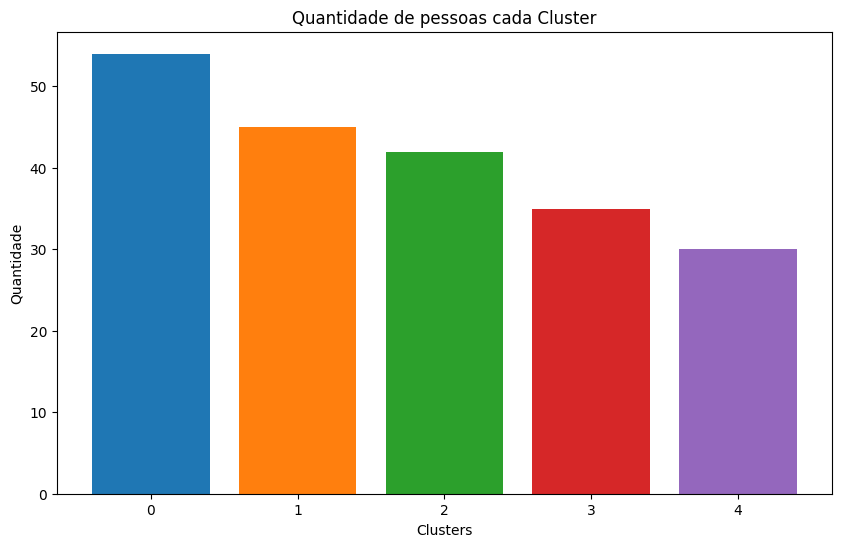

In [ ]:
# Contando a quantidade de cada cluster
contagem_clusters = res02['clusters'].value_counts()
# Definindo as cores
cores=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
# Criando o gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(contagem_clusters.index, contagem_clusters.values, color=cores)

# Adicionando títulos e rótulos
plt.title('Quantidade de pessoas cada Cluster')
plt.xlabel('Clusters')
plt.ylabel('Quantidade')

# Mostrando o gráfico
plt.show()

# Aplicação da técnica K-means e PCA (pensando na visualização dos clusters no plano)

In [ ]:
df2=df.values

In [ ]:
df2

array([[-0.42173601, -1.59705729, -0.83918384, -1.42611037, -0.99277646],
       [-0.42173601, -1.59705729, -0.83918384, -1.42611037, -0.99277646],
       [-0.42173601, -1.59705729, -0.83918384, -1.42611037, -0.7698873 ],
       ...,
       [ 0.74106194,  2.1051353 ,  0.60865428,  1.93977992,  0.12166935],
       [ 0.74106194,  2.1051353 ,  0.60865428,  1.93977992,  0.79033684],
       [-0.42173601,  2.34423524,  0.02951903,  2.61483631,  0.62316997]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)

In [ ]:
df2_pca=pca.fit_transform(df2)

In [ ]:
df2_pca

array([[-2.48443616e+00, -2.29013185e-01],
       [-2.48443616e+00, -2.29013185e-01],
       [-2.40486358e+00, -1.58269538e-01],
       [-2.60379504e+00, -3.35128656e-01],
       [-2.48443616e+00, -2.29013185e-01],
       [-2.36507729e+00, -1.22897714e-01],
       [-2.44464987e+00, -1.93641362e-01],
       [-2.48443616e+00, -2.29013185e-01],
       [-1.84747462e+00,  4.40890207e-01],
       [-2.64315481e+00,  2.20308071e+00],
       [-1.97421134e+00,  9.09642796e-01],
       [-1.77527988e+00,  1.08650191e+00],
       [-1.77527988e+00,  1.08650191e+00],
       [-1.85485246e+00,  1.01575827e+00],
       [-1.57634842e+00,  1.26336103e+00],
       [-1.53656213e+00,  1.29873286e+00],
       [-1.77527988e+00,  1.08650191e+00],
       [-1.93442504e+00,  9.45014620e-01],
       [-3.16195702e+00,  2.70601933e-01],
       [-1.90687604e+00,  1.54348957e+00],
       [-2.14559379e+00,  1.33125863e+00],
       [-2.03754458e+00, -1.46716554e+00],
       [-1.95797200e+00, -1.39642189e+00],
       [-1.

In [ ]:
pca.explained_variance_ratio_.sum()

0.6918970252573989

In [ ]:
from sklearn.cluster import KMeans # importação da biblioteca
wcss = []                          # criação de variável com o metodo para otimização de k
for i in range (1,11):             # metodo de otimização com k
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=5, max_iter=300)
    kmeans.fit(df2_pca)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Text(0, 0.5, 'WCSS')

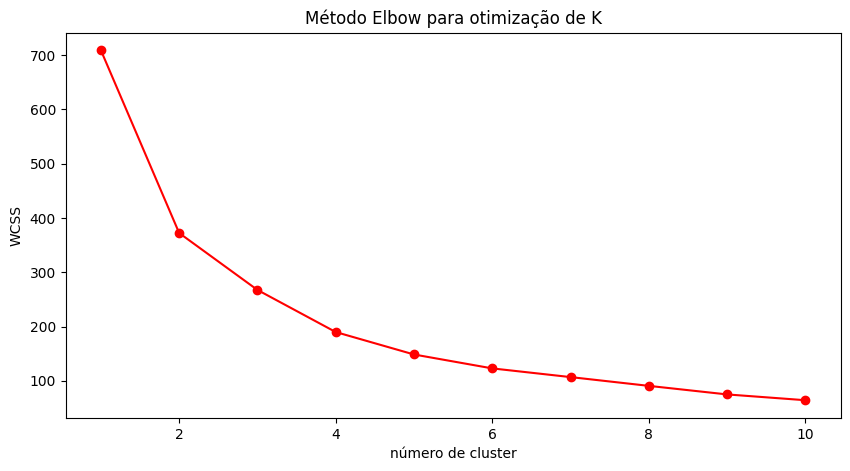

In [ ]:
# visualização do resultado do método de otimização de K
# idealmente busca-se o valor de k que é o principal ponto de inflexão entre X e Y

plt.figure(figsize=(10,5))                          # criaçãod da figura
sns.lineplot(x=range(1,11), y=wcss, color='red')    # determinação dos variáveis
plt.plot(range(1,11), wcss, 'o', color='red')       # determina os marcadores no gráfico
plt.title("Método Elbow para otimização de K")
plt.xlabel('número de cluster')
plt.ylabel('WCSS')

In [ ]:
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=5, max_iter=300)

In [ ]:
kmeans_pca=kmeans.fit(df2_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
centroides=kmeans_pca.cluster_centers_
centroides

array([[ 0.34290671,  0.54001954],
       [-1.41918619, -0.31700122],
       [ 2.43417756, -0.52090699]])

In [ ]:
classificacao = kmeans_pca.labels_
classificacao

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

## Visualização gráfica

In [ ]:
# Definindo as cores para cada cluster
cores = ['green', 'blue', 'red'] #'pink', 'purple']

# Criando um mapa de cores que mapeia cada cluster para uma cor
mapa_cores = {cluster: cor for cluster, cor in enumerate(cores)}

# Aplicando o mapa de cores à sua classificação para obter as cores dos pontos
cores_pontos = [mapa_cores[cluster] for cluster in classificacao]

# Criando um mapa de legendas que mapeia cada cor para o nome do cluster
mapa_legendas = {'green': 'Cluster 0',
                 'blue': 'Cluster 1',
                 'red': 'Cluster 2',
}

# Aplicando o mapa de legendas às cores dos pontos para obter os nomes dos clusters
nomes_clusters = [mapa_legendas[cor] for cor in cores_pontos]

# Criando o gráfico de dispersão para os dados
graf1 = px.scatter(x=dados[:,0], y=dados[:,1], color=nomes_clusters)

# Criando o gráfico de dispersão para os centroides
graf2 = px.scatter(x=centroides[:,0], y=centroides[:,1], size=[10,10,10])

# Concatenando as figuras
graf3 = go.Figure(data=graf1.data + graf2.data)

# Ajustando os elementos visuais da figura
graf3.update_layout(width=900, height=700, title_text='Agrupamento K-means e PCA')
graf3.update_xaxes(title_text='X')
graf3.update_yaxes(title_text='Y')

# Mostrando o gráfico
graf3.show()

# Aplicação da técnica Cluster Hierárquico



In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage


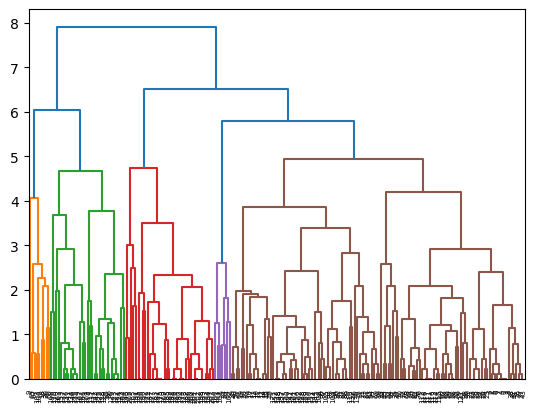

In [ ]:
dendrograma=dendrogram(linkage(df, method='complete'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hier=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')

In [ ]:
c_hier=hier.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [ ]:
c_hier

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
df_hier=pd.DataFrame(c_hier, columns=['cluster'])

In [ ]:
result_c_hier = pd.concat([df, df_hier], axis=1)


In [ ]:
result_c_hier

,age,weight,height,bmi,hgs,cluster
0,-0.421736,-1.597057,-0.839184,-1.426110,-0.992776,1
1,-0.421736,-1.597057,-0.839184,-1.426110,-0.992776,1
2,-0.421736,-1.597057,-0.839184,-1.426110,-0.769887,1
3,-0.421736,-1.597057,-0.839184,-1.426110,-1.327110,1
4,-0.421736,-1.597057,-0.839184,-1.426110,-0.992776,1
...,...,...,...,...,...,...
201,0.741062,2.105135,0.608654,1.939780,0.790337,2
202,0.741062,2.105135,0.608654,1.939780,0.790337,2
203,0.741062,2.105135,0.608654,1.939780,0.121669,2
204,0.741062,2.105135,0.608654,1.939780,0.790337,2


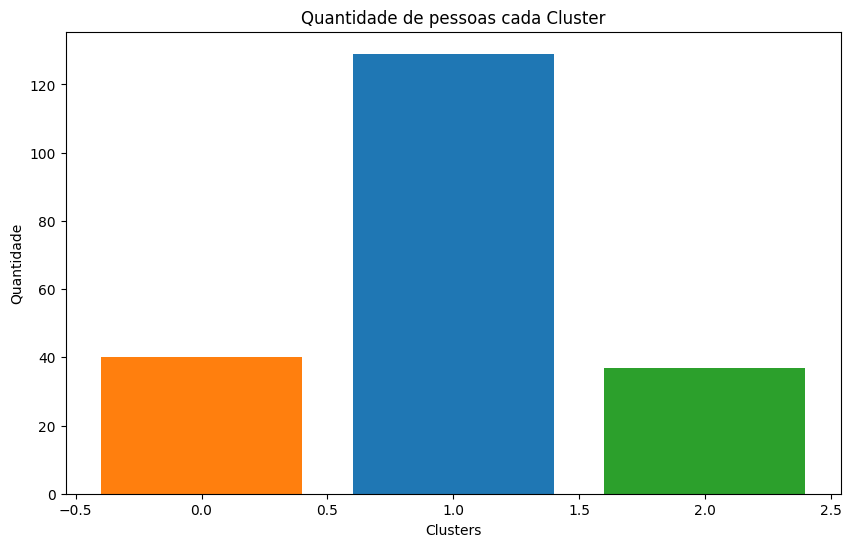

In [ ]:
# Contando a quantidade de cada cluster
contagem_clusters = result_c_hier['cluster'].value_counts()
# Definindo as cores
cores=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
# Criando o gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(contagem_clusters.index, contagem_clusters.values, color=cores)

# Adicionando títulos e rótulos
plt.title('Quantidade de pessoas cada Cluster')
plt.xlabel('Clusters')
plt.ylabel('Quantidade')

# Mostrando o gráfico
plt.show()

In [ ]:
result_c_hier.loc[result_c_hier.cluster == 2]

,age,weight,height,bmi,hgs,cluster
146,-0.587850,0.701387,-1.852671,2.053853,-0.212664,2
165,-1.916762,0.994478,-0.983968,1.783346,1.236115,2
169,2.069974,1.264429,1.187790,0.697212,0.456003,2
172,0.408834,1.279855,1.332573,0.630571,0.901781,2
173,-0.255622,1.295281,-1.563103,2.593241,-0.101220,2
174,1.903860,1.333845,0.463870,1.204477,1.459004,2
175,1.239404,1.333845,1.043006,0.852718,0.121669,2
176,1.903860,1.333845,0.463870,1.204477,1.236115,2
177,1.239404,1.333845,1.043006,0.852718,-0.101220,2
178,1.903860,1.333845,0.463870,1.204477,1.459004,2


# Aplicação da técnica DBSCAN

## Essa técnioca realiza a mensuração da dnesidade dos dados para compor os cluster a partir de 2 parametros (Epson=raio da reta de agrupamento e min_sample=numero minimo de elementos por cluster)

In [ ]:
df_mod=df.values

In [ ]:
df_mod

array([[-0.42173601, -1.59705729, -0.83918384, -1.42611037, -0.99277646],
       [-0.42173601, -1.59705729, -0.83918384, -1.42611037, -0.99277646],
       [-0.42173601, -1.59705729, -0.83918384, -1.42611037, -0.7698873 ],
       ...,
       [ 0.74106194,  2.1051353 ,  0.60865428,  1.93977992,  0.12166935],
       [ 0.74106194,  2.1051353 ,  0.60865428,  1.93977992,  0.79033684],
       [-0.42173601,  2.34423524,  0.02951903,  2.61483631,  0.62316997]])

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan=DBSCAN(eps=0.97, min_samples=4)
dbscan.fit(df_mod)

DBSCAN(eps=0.97, min_samples=4)

In [ ]:
class_dbscan = dbscan.labels_
class_dbscan

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,
        0, -1,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1,
        2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0, -1,
        0,  0,  3,  3,  3,  3,  3,  3,  3,  3, -1,  0,  0,  0,  0, -1, -1,
       -1, -1,  3,  3, -1, -1,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  4, -1, -1,  4,
       -1,  4,  4, -1,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4, -1, -1, -1,  4,  4, -1, -1,  4,  4,  4,  4,  4,  4,  4,
        4, -1])

In [ ]:
agrup_dbscan=pd.DataFrame(class_dbscan, columns=['grupos'])

In [ ]:
result_dbscan=pd.concat([df, agrup_dbscan], axis=1)

In [ ]:
result_dbscan

,age,weight,height,bmi,hgs,grupos
0,-0.421736,-1.597057,-0.839184,-1.426110,-0.992776,0
1,-0.421736,-1.597057,-0.839184,-1.426110,-0.992776,0
2,-0.421736,-1.597057,-0.839184,-1.426110,-0.769887,0
3,-0.421736,-1.597057,-0.839184,-1.426110,-1.327110,0
4,-0.421736,-1.597057,-0.839184,-1.426110,-0.992776,0
...,...,...,...,...,...,...
201,0.741062,2.105135,0.608654,1.939780,0.790337,4
202,0.741062,2.105135,0.608654,1.939780,0.790337,4
203,0.741062,2.105135,0.608654,1.939780,0.121669,4
204,0.741062,2.105135,0.608654,1.939780,0.790337,4


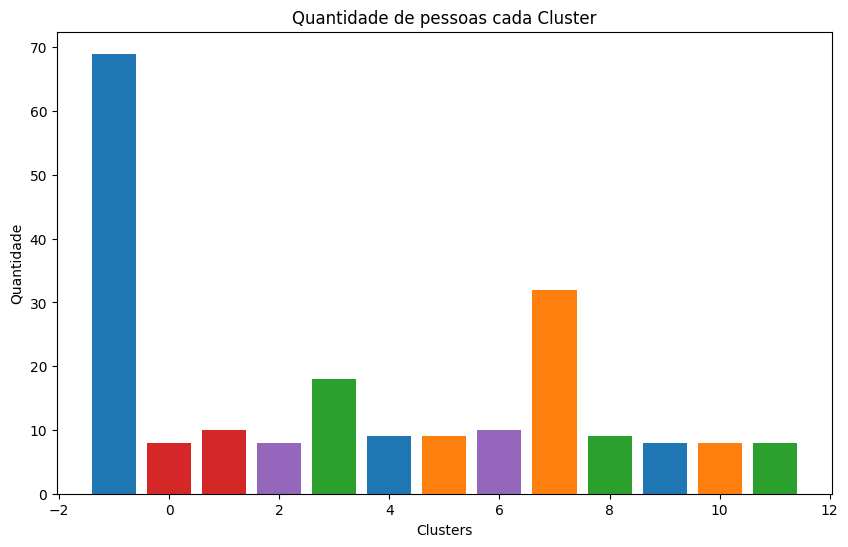

In [ ]:
# Contando a quantidade de cada cluster
contagem_clusters = result_dbscan['grupos'].value_counts()
# Definindo as cores
cores=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
# Criando o gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(contagem_clusters.index, contagem_clusters.values, color=cores)

# Adicionando títulos e rótulos
plt.title('Quantidade de pessoas cada Cluster')
plt.xlabel('Clusters')
plt.ylabel('Quantidade')

# Mostrando o gráfico
plt.show()

In [ ]:
result_dbscan.loc[result_dbscan.grupos == 1]

,age,weight,height,bmi,hgs,grupos
21,0.574948,-1.211412,-1.273535,-0.747109,-2.107222,1
22,0.574948,-1.211412,-1.273535,-0.747109,-1.884333,1
23,0.574948,-1.211412,-1.273535,-0.747109,-1.661444,1
24,0.574948,-1.211412,-1.273535,-0.747109,-1.438555,1
25,0.574948,-1.211412,-1.273535,-0.747109,-1.215666,1
26,0.574948,-1.211412,-1.273535,-0.747109,-0.992776,1
27,0.574948,-1.211412,-1.273535,-0.747109,-1.884333,1
28,0.574948,-1.211412,-1.273535,-0.747109,-1.661444,1


# Aplicação da técnica MeanShift

## Por meio de interações aleatórias de análises de densidade esse algoritmo identifica os 'centros de massa' para compor o numero de clusters e faz o agruoamento

por meio e interações e análises de densidade identifica e automaticamente agrupa os dados

In [ ]:
df_mod

array([[-0.42173601, -1.59705729, -0.83918384, -1.42611037, -0.99277646],
       [-0.42173601, -1.59705729, -0.83918384, -1.42611037, -0.99277646],
       [-0.42173601, -1.59705729, -0.83918384, -1.42611037, -0.7698873 ],
       ...,
       [ 0.74106194,  2.1051353 ,  0.60865428,  1.93977992,  0.12166935],
       [ 0.74106194,  2.1051353 ,  0.60865428,  1.93977992,  0.79033684],
       [-0.42173601,  2.34423524,  0.02951903,  2.61483631,  0.62316997]])

In [ ]:
from sklearn.cluster import MeanShift

In [ ]:
mean=MeanShift(bandwidth=1.6, cluster_all=True)

In [ ]:
mean.fit(df_mod)

MeanShift(bandwidth=1.6)

In [ ]:
agrup_mean=mean.labels_

In [ ]:
agrup_mean=pd.DataFrame(agrup_mean, columns=['grupos'])

In [ ]:
result_mean=pd.concat([df, agrup_mean], axis=1)

In [ ]:
result_mean

,age,weight,height,bmi,hgs,grupos
0,-0.421736,-1.597057,-0.839184,-1.426110,-0.992776,3
1,-0.421736,-1.597057,-0.839184,-1.426110,-0.992776,3
2,-0.421736,-1.597057,-0.839184,-1.426110,-0.769887,3
3,-0.421736,-1.597057,-0.839184,-1.426110,-1.327110,3
4,-0.421736,-1.597057,-0.839184,-1.426110,-0.992776,3
...,...,...,...,...,...,...
201,0.741062,2.105135,0.608654,1.939780,0.790337,1
202,0.741062,2.105135,0.608654,1.939780,0.790337,1
203,0.741062,2.105135,0.608654,1.939780,0.121669,1
204,0.741062,2.105135,0.608654,1.939780,0.790337,1


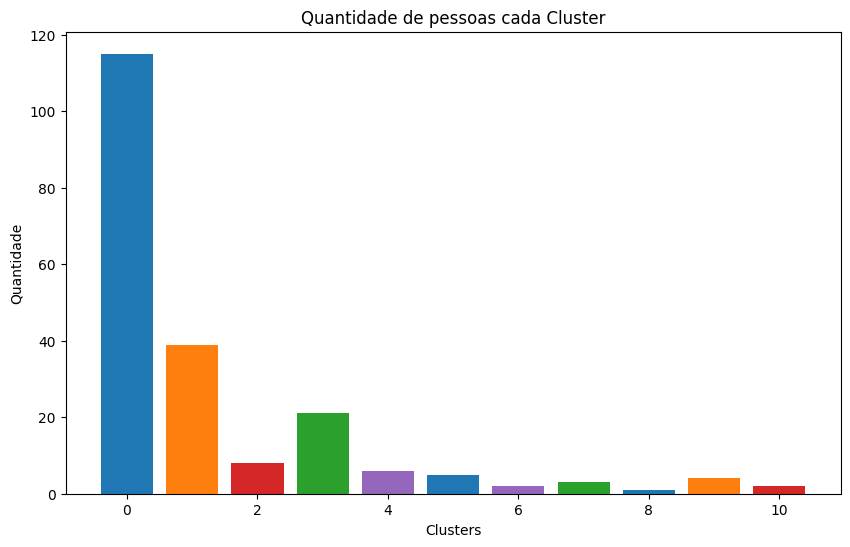

In [ ]:
# Contando a quantidade de cada cluster
contagem_clusters = result_mean['grupos'].value_counts()
# Definindo as cores
cores=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
# Criando o gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(contagem_clusters.index, contagem_clusters.values, color=cores)

# Adicionando títulos e rótulos
plt.title('Quantidade de pessoas cada Cluster')
plt.xlabel('Clusters')
plt.ylabel('Quantidade')

# Mostrando o gráfico
plt.show()

# Considerações

## 1 - Desconsiderando a idade, haveriam melhores formações de grupos? mais homogêneos
## 2 - Considerando somente duas variáveis produziria melhores clusters?  BMI e HGS <p>
